In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
file_path = "C:/Users/aniki/Desktop/MBA/Term 5/Marketing Analytics/sessionn3,4/Cafe Transactions.xlsx"  # Update this path
df = pd.read_excel(file_path)

In [5]:
# Drop unnecessary columns
df.drop(columns=['Date', 'POS Bill ID', 'Customer Profile Name', 'Item Desc', 'Time'], inplace=True)


In [7]:
df.head()

,Quantity,Unit Price,Tax Amount (INR),Discount Amount (INR),Total,Category
0,1,50.0,11.88,0.0,61.88,BEVERAGE
1,1,100.0,23.75,0.0,123.75,BEVERAGE
2,1,40.0,9.50,0.0,49.50,BEVERAGE
3,1,50.0,11.88,0.0,61.88,BEVERAGE
4,1,45.0,10.69,0.0,55.69,BEVERAGE


In [9]:
# One Hot Encoding for the 'Category' column
df = pd.get_dummies(df, columns=['Category'], drop_first=True)


In [11]:
df.head()

,Quantity,Unit Price,Tax Amount (INR),Discount Amount (INR),Total,Category_FOOD,Category_LIQUOR,Category_LIQUOR,Category_LIQUOR & TPBACCO,Category_MERCHANDISE,Category_MISC,Category_TOBACCO,Category_WINES
0,1,50.0,11.88,0.0,61.88,False,False,False,False,False,False,False,False
1,1,100.0,23.75,0.0,123.75,False,False,False,False,False,False,False,False
2,1,40.0,9.50,0.0,49.50,False,False,False,False,False,False,False,False
3,1,50.0,11.88,0.0,61.88,False,False,False,False,False,False,False,False
4,1,45.0,10.69,0.0,55.69,False,False,False,False,False,False,False,False


In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Assuming 'df' is your DataFrame and 'Total' is the target variable
# Drop the target variable to scale only the features
X = df.drop(columns=['Total'])

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame for easier manipulation
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the scaled DataFrame
print(X_scaled_df.head())

   Quantity  Unit Price  Tax Amount (INR)  Discount Amount (INR)  \
0  -0.25417   -1.093286         -0.919954              -0.025554   
1  -0.25417   -0.604261         -0.625214              -0.025554   
2  -0.25417   -1.191091         -0.979052              -0.025554   
3  -0.25417   -1.093286         -0.919954              -0.025554   
4  -0.25417   -1.142189         -0.949503              -0.025554   

   Category_FOOD  Category_LIQUOR  Category_LIQUOR   \
0      -0.801312         -0.21072         -0.002619   
1      -0.801312         -0.21072         -0.002619   
2      -0.801312         -0.21072         -0.002619   
3      -0.801312         -0.21072         -0.002619   
4      -0.801312         -0.21072         -0.002619   

   Category_LIQUOR & TPBACCO  Category_MERCHANDISE  Category_MISC  \
0                  -0.019247             -0.057885      -0.090589   
1                  -0.019247             -0.057885      -0.090589   
2                  -0.019247             -0.057885   

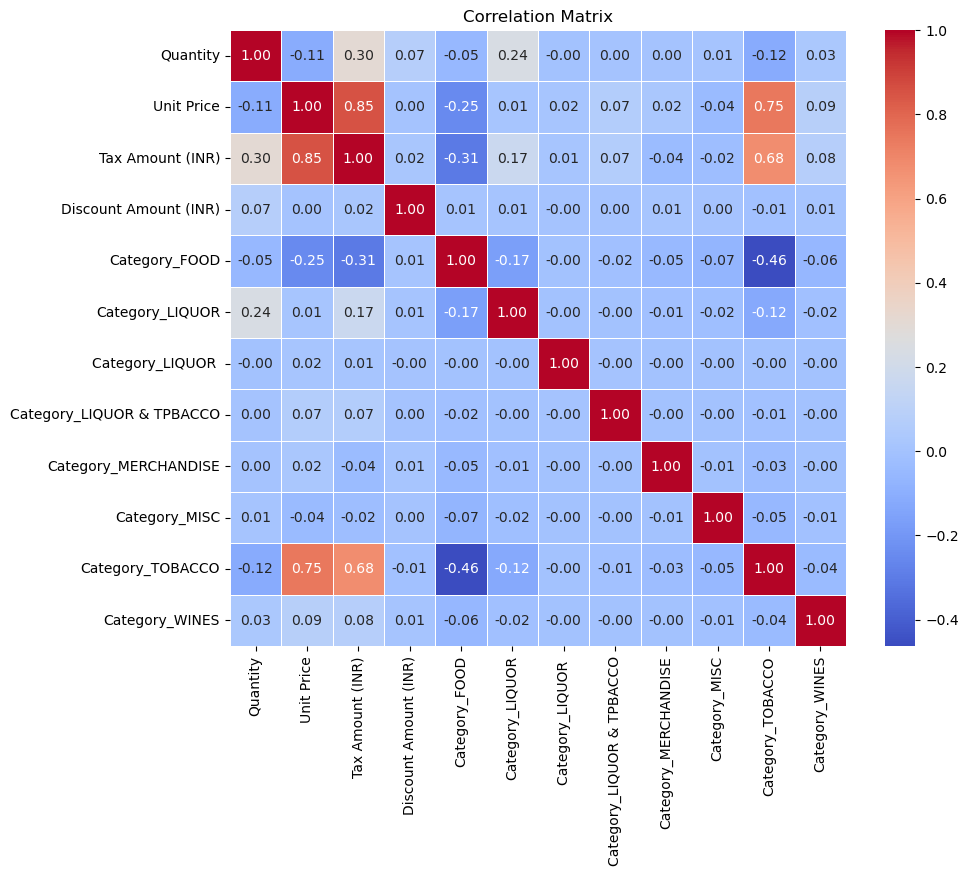

In [15]:
# Calculate the correlation matrix, excluding the 'Total' column
correlation_matrix = df.drop(columns=['Total']).corr()

# Display the correlation matrix using a heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [18]:
# Set the threshold for correlation
threshold = 0.8

# Get the correlation matrix
correlation_matrix = df.drop(columns=['Total']).corr()

# Create a DataFrame to store the pairs of highly correlated variables
high_correlation_pairs = []

# Iterate through the correlation matrix to find pairs of highly correlated columns
for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        if col != row:  # Exclude self-correlation
            if abs(correlation_matrix.loc[row, col]) >= threshold:
                high_correlation_pairs.append((row, col, correlation_matrix.loc[row, col]))

# Convert the list to a DataFrame for better visualization
high_correlation_df = pd.DataFrame(high_correlation_pairs, columns=['Variable 1', 'Variable 2', 'Correlation'])

# Display the high correlation pairs
print(high_correlation_df)

         Variable 1        Variable 2  Correlation
0  Tax Amount (INR)        Unit Price     0.854242
1        Unit Price  Tax Amount (INR)     0.854242


In [20]:
# Assuming 'Total' is your target variable and the remaining columns are features
X = df.drop(columns=['Total'])
y = df['Total']

In [26]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R-squared value and Mean Squared Error
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display the coefficients and the R-squared value
print("Linear Regression Coefficients:")
for i, col in enumerate(X.columns):
    print(f"{col}: {model.coef_[i]}")

print(f"\nModel Accuracy (R-squared): {r_squared * 100:.2f}%")
print(f"Mean Squared Error: {mse:.2f}")

Linear Regression Coefficients:
Quantity: 24.575611607068243
Unit Price: 0.2103537215220208
Tax Amount (INR): 3.8483636977183453
Discount Amount (INR): 0.8741286680104763
Category_FOOD: 6.942039197654818
Category_LIQUOR: -31.829864651962257
Category_LIQUOR : -89.38418522236934
Category_LIQUOR & TPBACCO: -65.1394279326472
Category_MERCHANDISE: 106.64772774899166
Category_MISC: -12.11285015602995
Category_TOBACCO: -44.559897323246346
Category_WINES: 11.643420594088216

Model Accuracy (R-squared): 98.57%
Mean Squared Error: 470.18
